In [2]:
import os
from os import listdir
from os.path import isfile, join
R1000_file = './russell/1000'
R2000_file = './russell/2000'

R1000_filename= os.listdir(R1000_file)
R2000_filename=os.listdir(R2000_file)

import sys

import pandas as pd

R1000_list = pd.DataFrame(columns = ['Year','Ticker','Price'])
for file in R1000_filename:
    temp = pd.read_excel(os.path.join(os.getcwd(), R1000_file, file))
    temp = temp[['Ticker','Price']]
    temp['Ticker'] = temp['Ticker'].apply(lambda x: x[:-9])
    temp['Year'] = file[-10:-6]
    R1000_list = R1000_list.append(temp, ignore_index = True)
    
R2000_list = pd.DataFrame(columns = ['Year','Ticker','Price'])
for file in R2000_filename:
    temp = pd.read_excel(os.path.join(os.getcwd(), R2000_file, file))
    temp = temp[['Ticker','Price']]
    temp['Ticker'] = temp['Ticker'].apply(lambda x: x[:-9])
    temp['Year'] = file[-10:-6]
    R2000_list = R2000_list.append(temp, ignore_index = True)
    
R2000_list['Membership'] = 'R2000'
R1000_list['Membership'] = 'R1000'

Russell_all = R1000_list.append(R2000_list, ignore_index = True)

C:\Users\barry\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [3]:
Russell_all.to_excel('Membership.xlsx')

In [4]:
BoardEx_comp = pd.read_csv(os.path.join(os.getcwd(), 'BoardEx','annual remuneration.csv'), encoding = 'latin-1')

In [5]:
BoardEx_comp_avg = BoardEx_comp[BoardEx_comp['RowType'] == 'Board Average']

In [6]:
BoardEx_comp_avg.columns

Index(['RowType', 'BoardName', 'NED', 'DirectorName', 'RoleName', 'Currency',
       'RoleStatus', 'RemChgeLast', 'BoardID', 'DirectorID', 'Salary', 'Bonus',
       'Other', 'PenEmpCon', 'TotalCompensation', 'ValTotEqHeld',
       'ValLTIPHeld', 'IntValOptHeld', 'EstValOptHeld', 'TotEqLinkedWlth',
       'ValEqAward', 'LTIPValue', 'IntrValOptAward', 'EstValOptAward',
       'TotEqAtRisk', 'TotRemPeriod', 'BonusRatio', 'EqLinkRemRatio',
       'WealthDelta', 'TotalDirectComp', 'PerfTotal', 'AnnualReportDate'],
      dtype='object')

In [7]:
BoardEx_comp_avg.shape

(115259, 32)

In [8]:
BoardEx_profile = pd.read_csv(os.path.join(os.getcwd(), 'BoardEx','company profile.csv'), encoding = 'latin-1')

C:\Users\barry\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (21,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
#BoardEx_comp_avg.describe()

In [10]:
BoardEx_profile = BoardEx_profile.set_index('BoardID')
BoardID_Ticker = BoardEx_profile['Ticker']
BoardID_Ticker = BoardID_Ticker.groupby(BoardID_Ticker.index).first()
BoardEx_comp_avg['Ticker'] = BoardEx_comp_avg['BoardID'].apply(lambda x: BoardID_Ticker[x])

C:\Users\barry\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [38]:
BoardEx_comp_avg_public = BoardEx_comp_avg.dropna(subset = ['Ticker'])

In [39]:
BoardEx_comp_avg_public = BoardEx_comp_avg_public[BoardEx_comp_avg_public['TotalCompensation'] != 0]

In [40]:
BoardEx_comp_avg_public.describe().columns

Index(['RemChgeLast', 'BoardID', 'DirectorID', 'Salary', 'Bonus', 'Other',
       'PenEmpCon', 'TotalCompensation', 'ValTotEqHeld', 'ValLTIPHeld',
       'IntValOptHeld', 'EstValOptHeld', 'TotEqLinkedWlth', 'ValEqAward',
       'LTIPValue', 'IntrValOptAward', 'EstValOptAward', 'TotEqAtRisk',
       'TotRemPeriod', 'BonusRatio', 'EqLinkRemRatio', 'WealthDelta',
       'TotalDirectComp', 'PerfTotal', 'AnnualReportDate'],
      dtype='object')

In [49]:
#BoardEx_comp_avg_public[['Salary','TotalCompensation','PenEmpCon']] = BoardEx_comp_avg_public[['Salary','TotalCompensation','PenEmpCon']]*1000
BoardEx_comp_avg_public[['Bonus']] = BoardEx_comp_avg_public[['Bonus']]/100

In [83]:
print(BoardEx_comp_avg_public.describe()[['Salary','Bonus','PenEmpCon','LTIPValue','EstValOptAward','Other','TotalCompensation']].round(2).T.to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
{} &    count &       mean &        std &     min &       25\% &       50\% &       75\% &         max \\
\midrule
Salary            &  13629.0 &  162316.02 &   97058.38 &     0.0 &  107000.0 &  152000.0 &  200000.0 &   3499000.0 \\
Bonus             &   6952.0 &    1202.09 &    2245.78 &     0.0 &     258.0 &     612.0 &    1336.5 &     90000.0 \\
PenEmpCon         &   8460.0 &   21237.00 &   55052.54 &     0.0 &    6000.0 &   10000.0 &   16000.0 &   1250000.0 \\
LTIPValue         &  10232.0 &    1920.36 &    6351.06 &     0.0 &     378.0 &     821.0 &    1604.0 &    319443.0 \\
EstValOptAward    &   9852.0 &    4778.19 &   15764.61 &     0.0 &     605.0 &    1926.0 &    5331.5 &   1010132.0 \\
Other             &  12572.0 &     128.01 &     732.34 &     0.0 &      15.0 &      35.0 &      88.0 &     42908.0 \\
TotalCompensation &  13629.0 &  252017.54 &  308253.48 &  1000.0 &  137000.0 &  190000.0 &  269000.0 &  12857000.0 \\
\bottomrule
\end{tabula

In [50]:
BoardEx_comp_avg_public.to_excel('BoardEx_use.xlsx')

In [67]:
import numpy as np
Russell_all_1000 = Russell_all[Russell_all['Membership'] == 'R1000']
Russell_all_2000 = Russell_all[Russell_all['Membership'] == 'R2000']

Russell_change_count = pd.DataFrame(columns = ['R1000','R2000'], index = range(1999,2018))
cutoff_count = pd.DataFrame(columns = ['Add','Remove'], index = range(1999,2018))
for year in range(1998,2017):
    R1000_past = Russell_all_1000[Russell_all_1000['Year'].astype(int) == year]
    R1000_now = Russell_all_1000[Russell_all_1000['Year'].astype(int) == year+1]
    change1 = R1000_past.shape[0] + R1000_now.shape[0] - 2*np.intersect1d(R1000_now['Ticker'],R1000_past['Ticker']).shape[0]
    
    R2000_past = Russell_all_2000[Russell_all_2000['Year'].astype(int) == year]
    R2000_now = Russell_all_2000[Russell_all_2000['Year'].astype(int) == year+1]
    change2 = R2000_past.shape[0] + R2000_now.shape[0] - 2*np.intersect1d(R2000_now['Ticker'],R2000_past['Ticker']).shape[0]

    Russell_change_count.loc[year+1] = [change1,change2]
    cutoff_count.loc[year+1] = [np.intersect1d(R2000_past['Ticker'],R1000_now['Ticker']).shape[0],
                               np.intersect1d(R2000_now['Ticker'],R1000_past['Ticker']).shape[0]]

In [93]:
import matplotlib.pyplot as plt
% matplotlib notebook


<IPython.core.display.Javascript object>


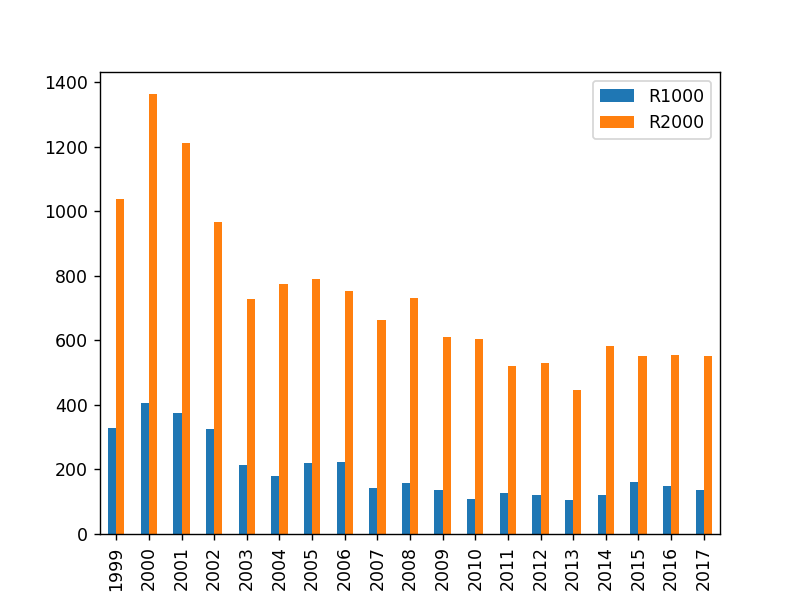

In [94]:
Russell_change_count.plot(kind = 'bar')
plt.show()

<IPython.core.display.Javascript object>


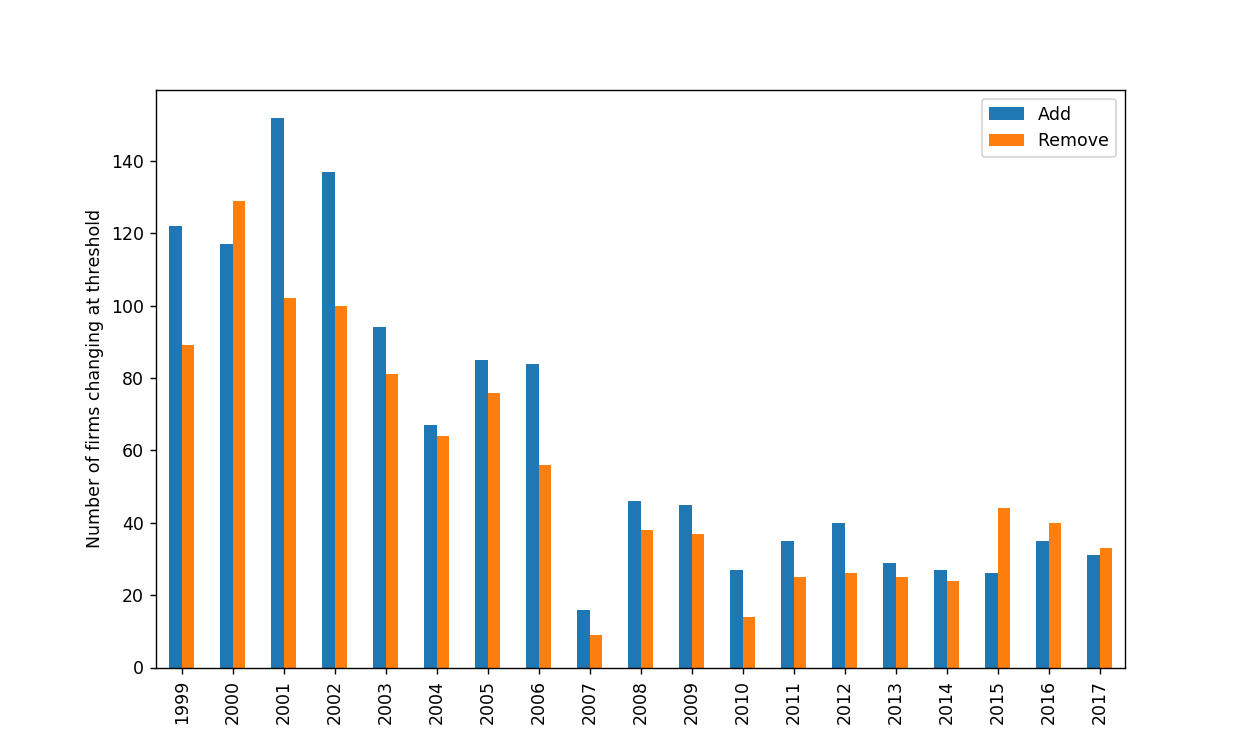

In [82]:
ax = cutoff_count.plot(kind = 'bar',figsize = (10,6))
ax.set_ylabel('Number of firms changing at threshold')
ax.axvline(x = 2007,linestyle = '--',color = 'grey')
#plt.show()

In [28]:
from dateutil.parser import parse

In [44]:
BoardEx_comp_avg_public['Year'] = BoardEx_comp_avg_public['AnnualReportDate'].apply(lambda x:parse(str(x)[:4]))

<IPython.core.display.Javascript object>


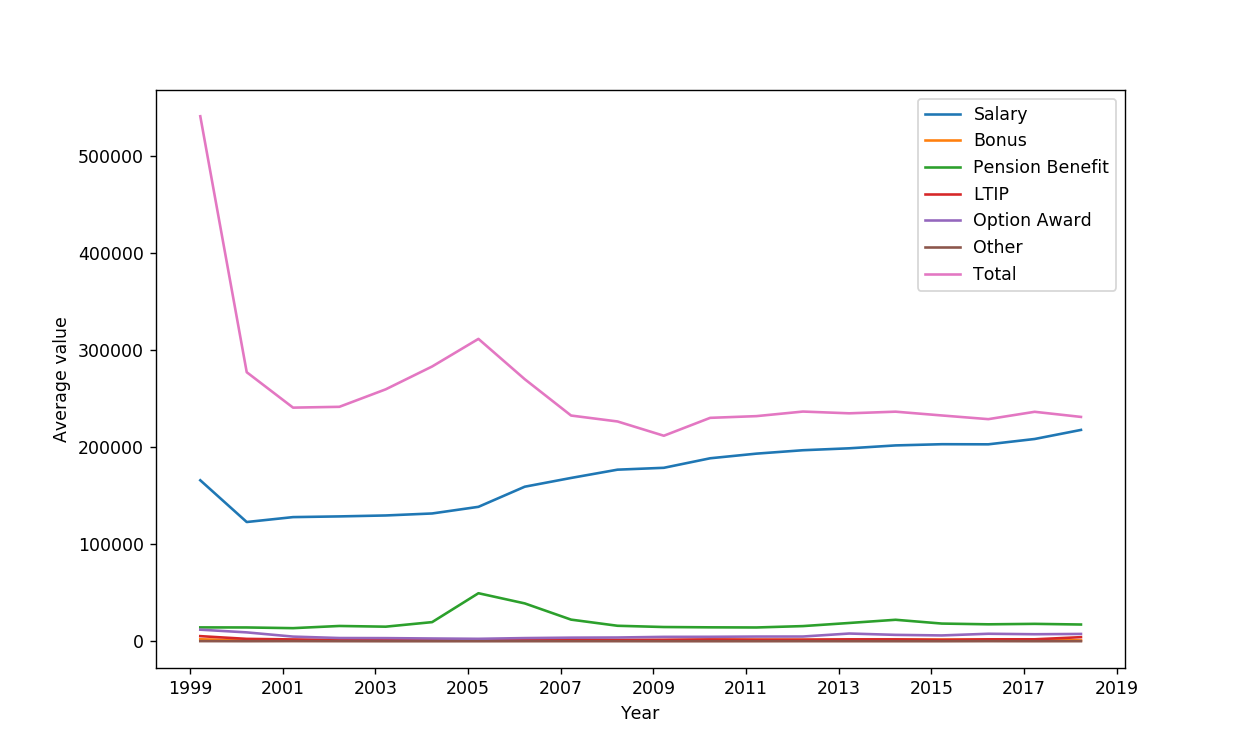

Text(0.5,0,'Year')

In [63]:
fig = plt.figure(figsize = (10,6))

BoardEx_plot = BoardEx_comp_avg_public.groupby('Year').mean()[['Salary','Bonus','PenEmpCon','LTIPValue','EstValOptAward','Other','TotalCompensation']]
plt.plot(BoardEx_plot['Salary'],label = 'Salary')
plt.plot(BoardEx_plot['Bonus'],label = 'Bonus')
plt.plot(BoardEx_plot['PenEmpCon'],label = 'Pension Benefit')
plt.plot(BoardEx_plot['LTIPValue'],label = 'LTIP')
plt.plot(BoardEx_plot['EstValOptAward'],label='Option Award')
plt.plot(BoardEx_plot['Other'], label = 'Other')
plt.plot(BoardEx_plot['TotalCompensation'], label = 'Total')
plt.legend(loc=1)

plt.ylabel('Average value')
plt.xlabel('Year')

In [118]:
np.savetxt('boardex_tic_list.txt',BoardEx_comp_avg_public['Ticker'].unique(),delimiter = '\n',fmt="%s")

In [119]:
np.savetxt('russell_tic_list.txt',Russell_all['Ticker'].unique(),delimiter = '\n',fmt="%s")

In [32]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [84]:
IO_sum

NameError: name 'IO_sum' is not defined